In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import random
from numpy import pi

In [39]:
femur = 0.40
tibia = 0.50

In [40]:
filepath = r'C:\Users\RafaelFragaGrecodeCa\Documents\OpenSim\4.5\Models\Gait2354_Simbody\OutputReference\subject01_walk1_ik.mot'

data = [[cell for cell in row.split('\t')] for row in open(filepath, 'r').readlines()[10:]]
df = pd.DataFrame(data)
df.columns = df.loc[0]
df.drop(0, inplace=True)
df = df.astype('float')
df.set_index('time', inplace=True)
df = df[['pelvis_tx', 'pelvis_ty', 'hip_flexion_r', 'knee_angle_r']]
df[['hip_flexion_r', 'knee_angle_r']] = np.radians(df[['hip_flexion_r', 'knee_angle_r']])
df['hip_angle'] = 3*pi/2 + df['hip_flexion_r']
df['knee_angle'] = df['hip_angle'] + df['knee_angle_r']

df['knee_x'] = np.cos(df['hip_angle'])*femur
df['knee_y'] = np.sin(df['hip_angle'])*femur
df['ankle_x'] = df['knee_x'] + np.cos(df['knee_angle'])*tibia
df['ankle_y'] = df['knee_y'] + np.sin(df['knee_angle'])*tibia

x_old = np.arange(len(df))
x_new = np.linspace(0, len(df) - 1, 100)

df_interpolated = pd.DataFrame()
for col in df.columns:
	f = interp1d(x_old, df[col].values, kind='cubic')
	df_interpolated[col] = f(x_new)

df_interpolated.index = np.linspace(df.index[0], df.index[-1], 100)
df_interpolated.index.name = 'time'
df = df_interpolated.copy()

df

,pelvis_tx,pelvis_ty,hip_flexion_r,knee_angle_r,hip_angle,knee_angle,knee_x,knee_y,ankle_x,ankle_y
time,,,,,,,,,,
0.400000,0.601020,1.045599,0.349382,-0.958532,5.061771,4.103239,0.136927,-0.375834,-0.149158,-0.785901
0.412121,0.599001,1.045029,0.354869,-0.896888,5.067258,4.170370,0.138987,-0.375078,-0.118969,-0.803455
0.424242,0.597214,1.043935,0.361014,-0.831250,5.073403,4.242152,0.141289,-0.374215,-0.085240,-0.819906
0.436364,0.595636,1.042727,0.362571,-0.760771,5.074960,4.314190,0.141872,-0.373995,-0.052017,-0.834898
0.448485,0.594069,1.041443,0.359580,-0.686114,5.071969,4.385856,0.140752,-0.374417,-0.019633,-0.848009
...,...,...,...,...,...,...,...,...,...,...
1.551515,0.594826,1.043865,0.218752,-1.206413,4.931141,3.724729,0.086806,-0.390474,-0.330568,-0.665799
1.563636,0.593906,1.044919,0.239390,-1.187748,4.951779,3.764031,0.094847,-0.388604,-0.311391,-0.680118
1.575758,0.592629,1.045561,0.260680,-1.163748,4.973069,3.809321,0.103091,-0.386469,-0.289510,-0.696062


In [41]:
df[['knee_x', 'knee_y', 'ankle_x', 'ankle_y']].values

np.savetxt('traj.txt', df[['knee_x', 'knee_y', 'ankle_x', 'ankle_y']].values, delimiter='\t')

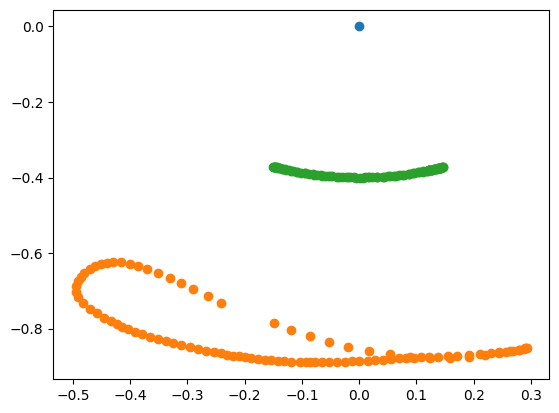

In [42]:
plt.scatter(x=0, y=0)
plt.scatter(x=df['ankle_x'], y=df['ankle_y'])
plt.scatter(x=df['knee_x'], y=df['knee_y'])